Classification Report:
               precision    recall  f1-score   support

       angry       1.00      1.00      1.00        66
       happy       1.00      1.00      1.00        75
         sad       1.00      1.00      1.00        60

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



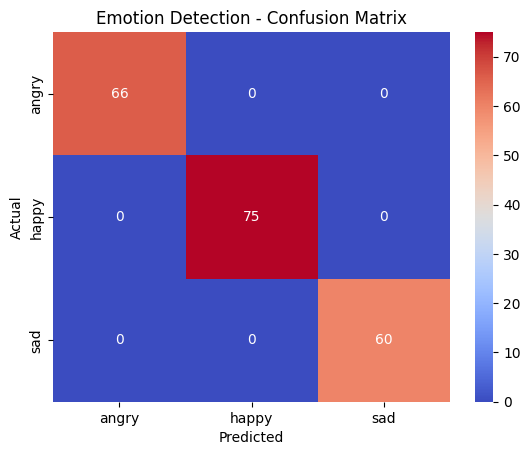

Model saved as 'emotion_detector_model.pkl'


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib

# Load the large dataset
df = pd.read_csv("emotion_dataset_large.csv")

# Clean text
df['clean_text'] = df['text'].apply(nfx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)

# Features and labels
X = df['clean_text']
y = df['emotion']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline
model_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train model
model_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = model_pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Emotion Detection - Confusion Matrix")
plt.show()

# Save model
joblib.dump(model_pipeline, "emotion_detector_model.pkl")
print("Model saved as 'emotion_detector_model.pkl'")

In [7]:
import joblib

# Load the trained model
model = joblib.load("emotion_detector_model.pkl")

# Sample text input
text_input = "I want to  just my  cry!"

# Predict emotion
predicted_emotion = model.predict([text_input])[0]

print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: sad
